In [14]:
import sys
import os
sys.path.append(os.path.abspath("../Codes"))
import pandas as pd
import numpy as np
from IVP.ivp_euler import euler
from IVP.ivp_RK4 import rk4
from IVP.ivp_predictorcorrector import predictor_corrector

#run the functions
e_s,main_r,er_s=euler("y-t**2+1",a1="0",b1="2",w1="0.5",n=4,return_main=True,return_error=True)
r_s,main_r,er_r=rk4("y-t**2+1",a1="0",b1="2",w1="0.5",n=4,return_main=True,return_error=True)
pc_s,main_r,er_pc=predictor_corrector("y-t**2+1",a1="0",b1="2",w1="0.5",n=4,return_main=True,return_error=True)
print("Solution by Euler's method= ",e_s,"and error= ",er_s)
print("Solution by RK4 method= ",r_s,"and error= ",er_r)
print("Solution by predictor corrector= ",pc_s, "and error= ",er_pc)



Solution by Euler's method=  [0.5    1.25   2.25   3.375  4.4375] and error=  [0.         0.17570107 0.39085809 0.63466063 0.86846922]
Solution by RK4 method=  [0.5        1.42513021 2.63960266 4.00681897 5.30160523] and error=  [0.         0.00057086 0.00125543 0.00284166 0.00436399]
Solution by predictor corrector=  [0.5        1.42513021 2.63960266 4.00681897 5.30277428] and error=  [0.         0.00057086 0.00125543 0.00284166 0.00319494]


Comparison with a table:

In [15]:
#for n=10
n=10
t1=np.linspace(0,2,n+1)

eu1,main_res,ere=euler("y-t**2+1",a1="0",b1="2",w1="0.5",n=10,return_main=True,return_error=True)
rk1,main_res,erk=rk4("y-t**2+1",a1="0",b1="2",w1="0.5",n=10,return_main=True,return_error=True)
pc1,main_res,erpc=predictor_corrector("y-t**2+1",a1="0",b1="2",w1="0.5",n=10,return_main=True,return_error=True)
data=[[a,b,c,d,e,f,g,h] for a,b,c,d,e,f,g,h in zip(t1,main_res,eu1,ere,rk1,erk,pc1,erpc)]
df=pd.DataFrame(data,columns=['t',"Exact solution","Euler's solution","Error in Euler's","Runge-Kutta's solution","Error in Runge-Kutta's","Predictor-Corrector's solution","Error in Predictor-Corrector's"])
display(df)

,t,Exact solution,Euler's solution,Error in Euler's,Runge-Kutta's solution,Error in Runge-Kutta's,Predictor-Corrector's solution,Error in Predictor-Corrector's
0,0.0,0.500000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000
1,0.2,0.829297,0.800000,0.029297,0.829293,0.000004,0.829293,0.000004
2,0.4,1.214121,1.152000,0.062121,1.214076,0.000045,1.214076,0.000045
3,0.6,1.649022,1.550400,0.098622,1.648922,0.000100,1.648922,0.000100
4,0.8,2.127299,1.988480,0.138819,2.127203,0.000096,2.127206,0.000093
5,1.0,2.640858,2.458176,0.182682,2.640823,0.000035,2.640829,0.000029
6,1.2,3.179908,2.949811,0.230097,3.179894,0.000014,3.179903,0.000006
7,1.4,3.732691,3.451773,0.280918,3.732340,0.000351,3.732350,0.000341
8,1.6,4.284154,3.950128,0.334026,4.283409,0.000745,4.283421,0.000733
9,1.8,4.815857,4.428154,0.387703,4.815086,0.000771,4.815096,0.000760


Euler's method gave errors of order 1e-1 whereas Runge-Kutta and Predictor-Corrector method gave error of order 1e-4.
Exact solutions are determined by scipy's solve_ivp command.
For better understanding, let's see the graphs of error vs time.

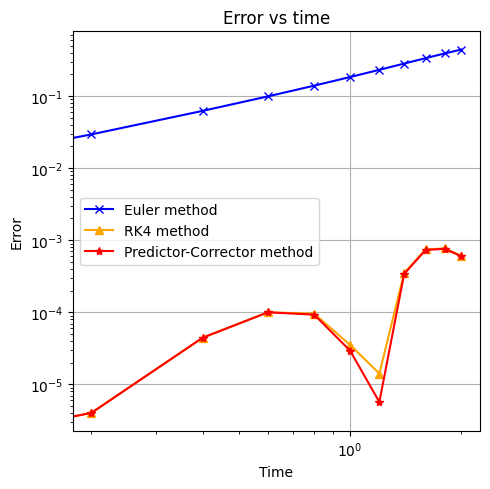

In [16]:
#visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.loglog(t1,ere,label="Euler method",color='blue',marker='x')
plt.loglog(t1,erk,label="RK4 method",color='orange',marker='^')
plt.loglog(t1,erpc,label="Predictor-Corrector method",color='Red',marker='*')
plt.title("Error vs time")
plt.xlabel("Time")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Euler's method's error steadily increased. Runge-Kutta and Predictor-Corrector method shows similar trends.